# Take a look at a `conv` layer

In [1]:
import os
import urllib.request

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import data as tf_data
import keras

In [2]:
# https://keras.io/api/applications/vgg/#vgg16-function

model = keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="vgg16",
)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## List the VGG16 `conv` layers and output shapes

In [3]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    filter , bias = layer.get_weights()
    print(i , layer.name , filter.shape, layer.output.shape)

1 block1_conv1 (3, 3, 3, 64) (None, 224, 224, 64)
2 block1_conv2 (3, 3, 64, 64) (None, 224, 224, 64)
4 block2_conv1 (3, 3, 64, 128) (None, 112, 112, 128)
5 block2_conv2 (3, 3, 128, 128) (None, 112, 112, 128)
7 block3_conv1 (3, 3, 128, 256) (None, 56, 56, 256)
8 block3_conv2 (3, 3, 256, 256) (None, 56, 56, 256)
9 block3_conv3 (3, 3, 256, 256) (None, 56, 56, 256)
11 block4_conv1 (3, 3, 256, 512) (None, 28, 28, 512)
12 block4_conv2 (3, 3, 512, 512) (None, 28, 28, 512)
13 block4_conv3 (3, 3, 512, 512) (None, 28, 28, 512)
15 block5_conv1 (3, 3, 512, 512) (None, 14, 14, 512)
16 block5_conv2 (3, 3, 512, 512) (None, 14, 14, 512)
17 block5_conv3 (3, 3, 512, 512) (None, 14, 14, 512)


## Select an image

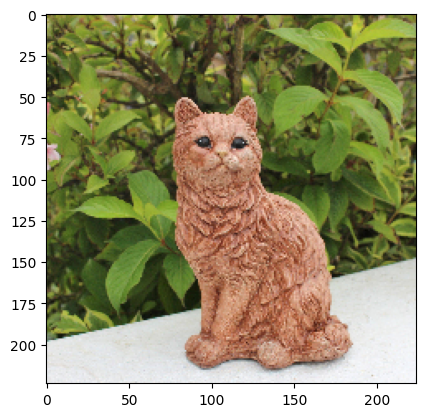

In [4]:
# load image with required shape
urllib.request.urlretrieve('https://www.sharonsable.com/images/14/13540/set-of-4-cat-sculptures-garden-sculpture-and-ornaments-garden-all-...-6680.jpg', "cat.jpg")
image = keras.utils.load_img("cat.jpg" , target_size=(224,224))

plt.imshow(image)
plt.show()

In [5]:
# convert the image to an array
image = keras.utils.img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

# images are converted from RGB to BGR, then each color channel
# is zero-centered with respect to the ImageNet dataset, without scaling
from tensorflow.keras.applications.vgg16 import preprocess_input
image = preprocess_input(image)

## Feature map

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


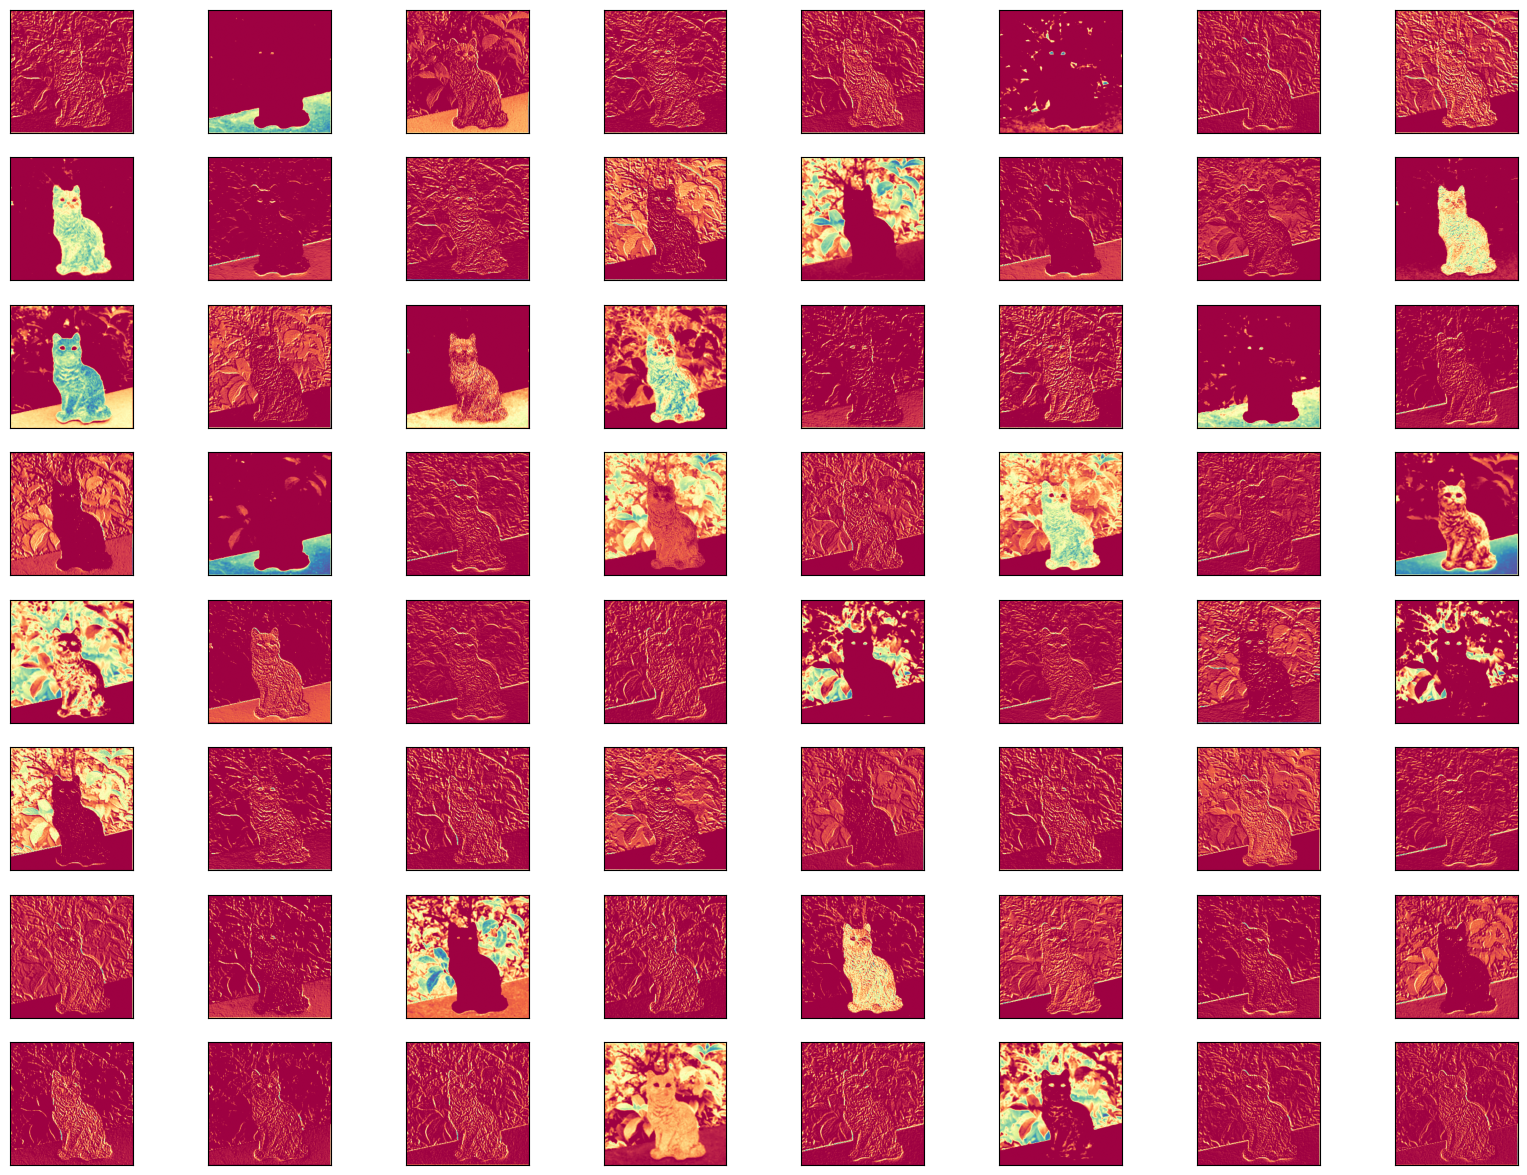

In [6]:
from tensorflow.keras.models import Model

layer_number = 1
model2 = Model(inputs=model.inputs , outputs=model.layers[layer_number].output)

#calculating features_map
features = model2.predict(image)

#Visualize the Feature Maps
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[0,:,:,i-1] , cmap='Spectral')
plt.show()